In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
vg_sales = pd.read_csv('./Data/VGSales.csv')
vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
vg_sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
vg_sales['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

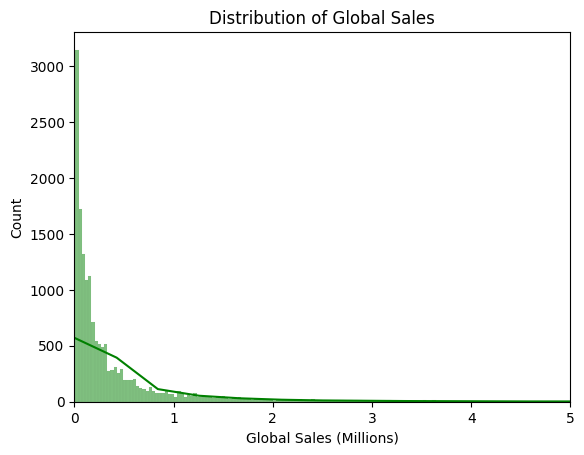

In [40]:
# Distibution of Global Sales
# The distribution is highly right-skewed. Most games sell significantly less than 1 million copies. The peak is between 0 and 0.5 million.
sns.histplot(vg_sales,x='Global_Sales',kde=True,color='green')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.xlim(0,5)
plt.show()

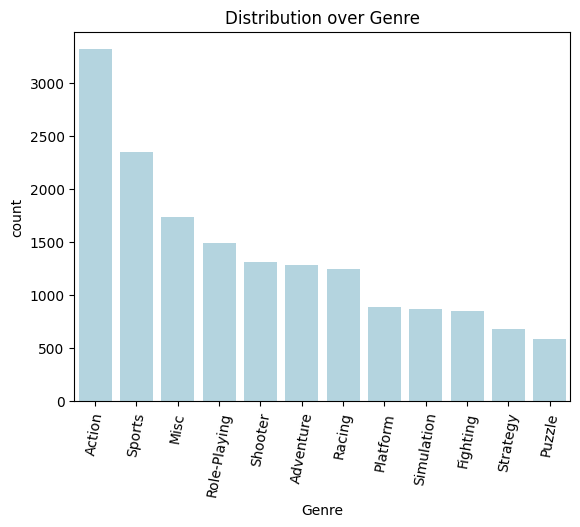

In [28]:
# Categorical feature analysis
# Action is the most frequent genre by a large margin, followed by Sports and Misc. This suggests that game developers and publishers have historically focused on Action titles more than any other category
sns.countplot(x='Genre',data=vg_sales,order=vg_sales['Genre'].value_counts().index,color='lightblue')
plt.xticks(rotation=80)
plt.title('Distribution over Genre')
plt.show()

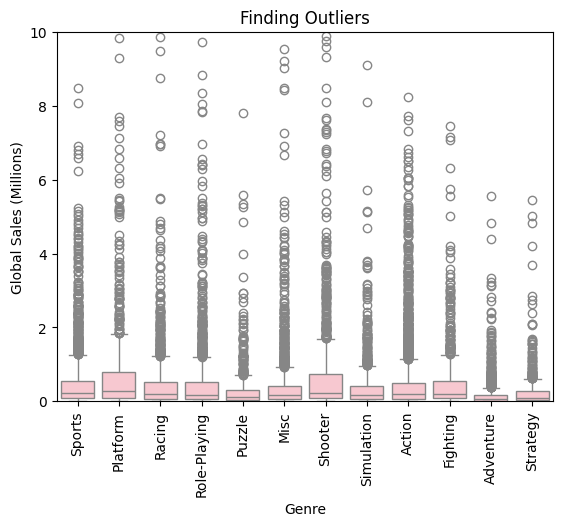

In [41]:
# Outlier identification
# The industry is heavily reliant on "Hit" games. This suggests that "average" sales are quite low, and the business model often targets these outlier successes.
sns.boxplot(vg_sales, x = 'Genre', y = 'Global_Sales', color='pink')
plt.title('Finding Outliers')
plt.xticks(rotation=90)
plt.ylabel('Global Sales (Millions)')
plt.ylim(0,10)
plt.show()

In [42]:
numeric_df = vg_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
numeric_corr = numeric_df.corr()
numeric_corr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


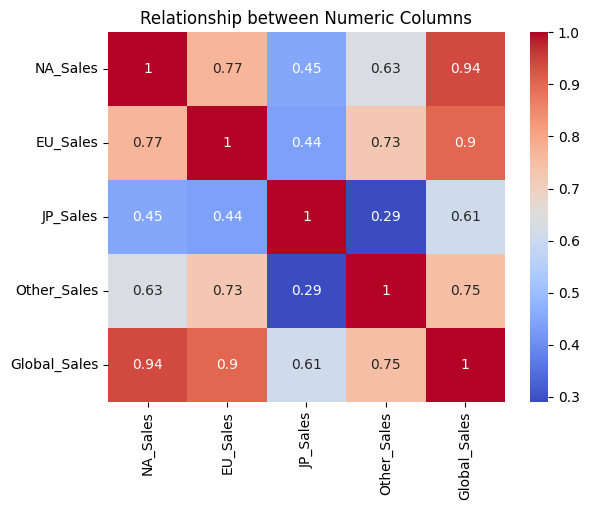

In [45]:
# Relation between numeric columns
# NA_Sales and EU_Sales are the strongest indicators of total success. If a game performs well in these two regions, it is almost guaranteed to be a global hit.
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('Relationship between Numeric Columns',loc='center')
plt.show()

In [46]:
vg_sales['Platform'].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

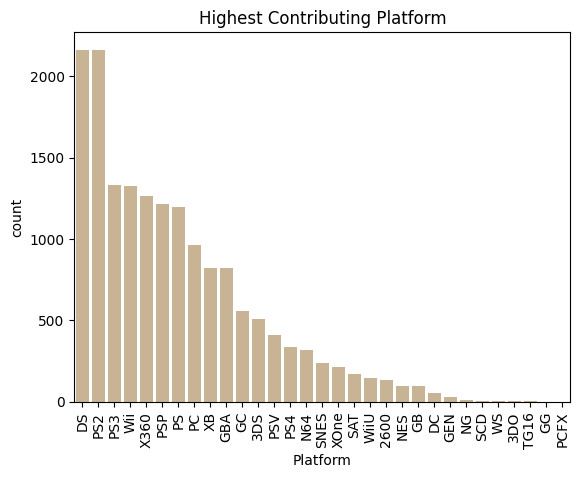

In [51]:
sns.countplot(vg_sales,x='Platform',color='tan',order=vg_sales['Platform'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Highest Contributing Platform')
plt.show()